In [30]:
import glob
import itertools
import numpy as np
import os
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import seaborn as sns

sns.set(font_scale = 1.0, style = 'darkgrid')
palette6 = sns.color_palette(["#C7243A", "#EDAD0B", "#A4C520", "#23AC0E", "#3261AB", "#744199"], 6)
plt.rcParams['font.family'] = 'Hiragino Maru Gothic Pro'

In [2]:
COLUMNS = {
    'network_type': str,
    'hop_game': int,
    'hop_learning': int,
    'b': float,
    'μ': float,
    'δ': float,
    'interaction_rule': str,
    'update_rule': str,
    'trial': int,
    'cooperator_rate': float
}
GROUPBY_COLUMNS = [c for c in COLUMNS if c not in ['trial', 'cooperator_rate']]

def load_df(csv_file_name: str) -> pd.DataFrame:
    _df = pd.read_csv(csv_file_name, header=None, names=COLUMNS.keys(), dtype=COLUMNS)
    return _df.groupby(GROUPBY_COLUMNS).agg({'cooperator_rate': np.mean}).reset_index()

def cooperate_criteria(_df: pd.DataFrame) -> pd.DataFrame:
    __df = _df.groupby(['b', 'δ', 'hop_game', 'hop_learning']).agg({'cooperator_rate': [len, np.mean, np.std, np.max]}).reset_index()
    __df.columns = ['b', 'δ', 'hop_game', 'hop_learning', 'cooperator_rate_len', 'cooperator_rate_mean', 'cooperator_rate_std', 'cooperator_rate_max']
    return __df[__df.cooperator_rate_max > 0.01]

def draw_graph(_df: pd.DataFrame, _x: str, _hue: str) -> None:
    for (_, network_type, interaction_rule, update_rule) in _df[['network_type', 'interaction_rule', 'update_rule']].drop_duplicates().itertuples():
        __df = _df[(_df.network_type == network_type) & (_df.interaction_rule == interaction_rule) & (_df.update_rule == update_rule)][[
            'hop_game', 'hop_learning', 'b', 'δ', 'μ', 'cooperator_rate'
        ]].reset_index(drop=True)
        g = sns.relplot(kind='line', x=_x, y='cooperator_rate', hue=_hue, row='δ', col='b', style='μ', data=__df)
        g.set_axis_labels(_x, 'Cooperator Rate')
        g.fig.suptitle('Network Type = {}, Interaction Rule = {}, Update Rule = {}'.format(network_type, interaction_rule, update_rule), size=25)
        g.fig.subplots_adjust(top=.95)
        g.set(ylim=(-0.01, 1))

# 1. PairWise

## 1.1. Network: All, Update: BD で協力が全く進化しないことを確認。

In [3]:
df_All_Pairwise_BD = load_df('../data/clean_data/All_Pairwise_BD.csv')
cooperate_criteria(df_All_Pairwise_BD)

,b,δ,hop_game,hop_learning,cooperator_rate_len,cooperator_rate_mean,cooperator_rate_std,cooperator_rate_max


## 1.2. Network: Regular, Update: IM でスパイクが生じることを確認。

In [4]:
df_Regular_PairWise_IM = load_df('../data/clean_data/Regular_PairWise_IM.csv')
cooperate_criteria(df_Regular_PairWise_IM)

,b,δ,hop_game,hop_learning,cooperator_rate_len,cooperator_rate_mean,cooperator_rate_std,cooperator_rate_max
6,1.1,0.01,2,1,2,0.242473,0.019727,0.256422
7,1.1,0.01,2,2,2,0.040089,0.056694,0.080178
42,1.1,0.10,2,1,2,0.219541,0.016236,0.231021


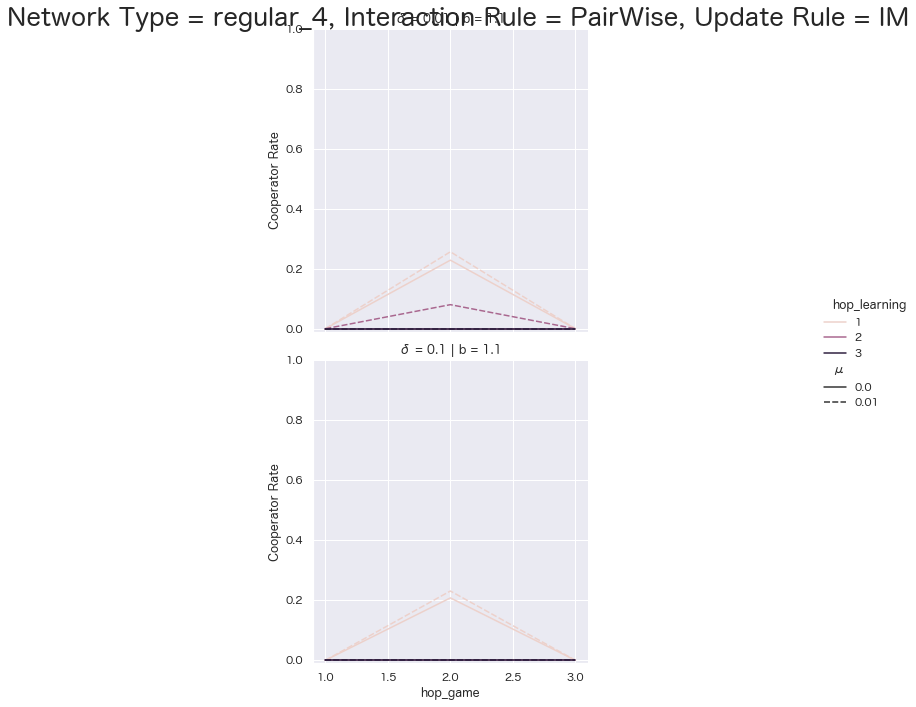

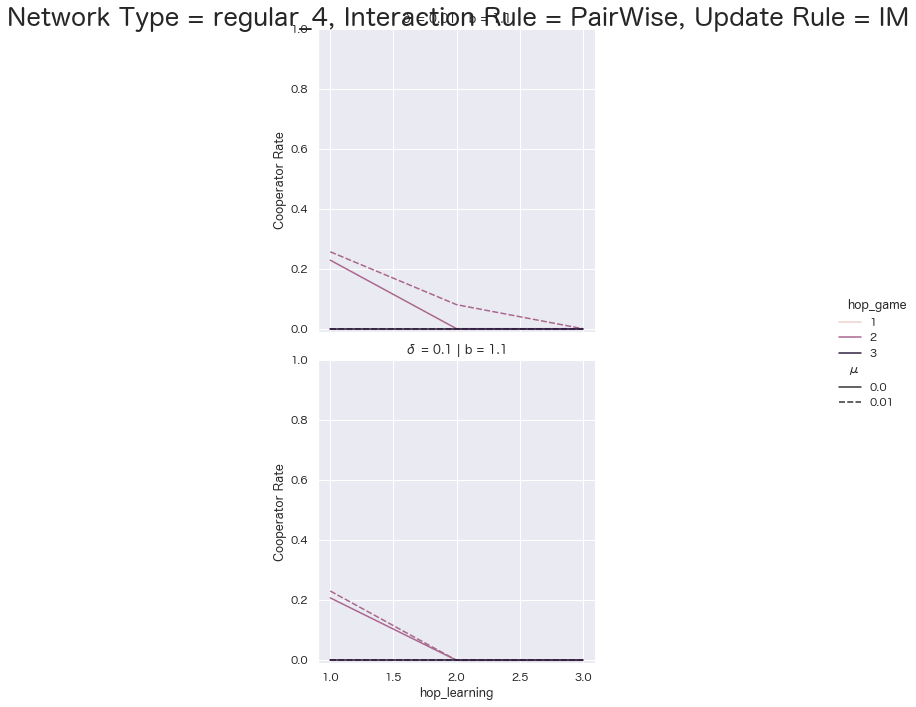

In [5]:
# 協力が進化する条件付近のデータのみ抽出してグラフで確認する。
_df = df_Regular_PairWise_IM[
    (df_Regular_PairWise_IM.b == 1.1) &
    df_Regular_PairWise_IM.hop_game.isin([1, 2, 3]) &
    df_Regular_PairWise_IM.hop_learning.isin([1, 2, 3]) &
    df_Regular_PairWise_IM.δ.isin([0.01, 0.1])
]
draw_graph(_df, 'hop_game', 'hop_learning')
draw_graph(_df, 'hop_learning', 'hop_game')

## 1.3. Network: Random, Update: IM でスパイクが生じることを確認。

In [6]:
df_Random_PairWise_IM = load_df('../data/clean_data/Random_PairWise_IM.csv')
cooperate_criteria(df_Random_PairWise_IM)

,b,δ,hop_game,hop_learning,cooperator_rate_len,cooperator_rate_mean,cooperator_rate_std,cooperator_rate_max
0,1.1,0.01,1,1,2,0.187459,0.088330,0.249918
6,1.1,0.01,2,1,2,0.865228,0.006819,0.870049
7,1.1,0.01,2,2,2,0.687500,0.265165,0.875000
12,1.1,0.01,3,1,2,0.156876,0.049225,0.191684
42,1.2,0.01,2,1,2,0.384563,0.035102,0.409384
78,1.3,0.01,2,1,1,0.182052,NaN,0.182052


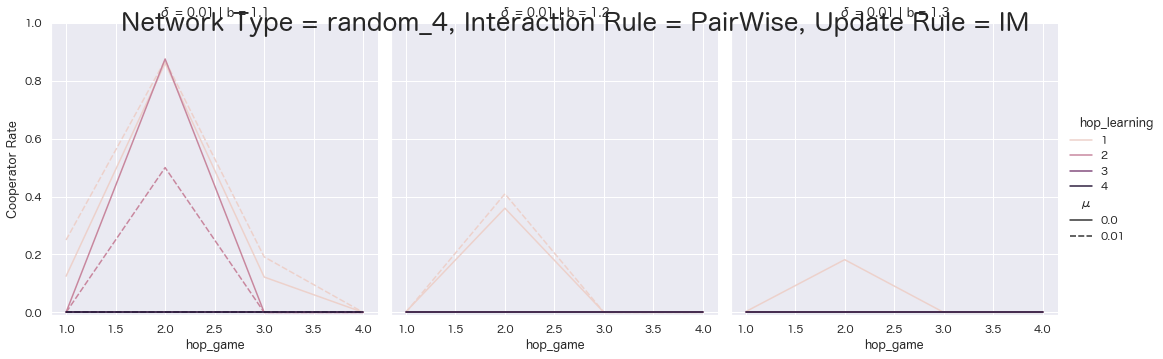

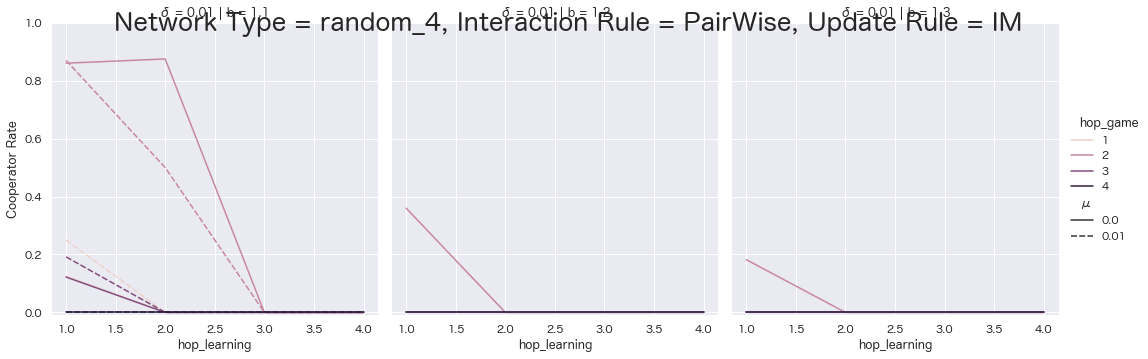

In [7]:
_df = df_Random_PairWise_IM[
    (df_Random_PairWise_IM.b <= 1.3) &
    df_Random_PairWise_IM.hop_game.isin([1, 2, 3, 4]) &
    df_Random_PairWise_IM.hop_learning.isin([1, 2, 3, 4])
]
draw_graph(_df, 'hop_game', 'hop_learning')
draw_graph(_df, 'hop_learning', 'hop_game')

## 1.4. Network: ScaleFree, Update: (DB | IM) でスパイクが生じることを確認。

In [8]:
df_ScaleFree_PairWise_DB_IM = load_df('../data/clean_data/ScaleFree_PairWise_DB_IM.csv')
cooperate_criteria(df_ScaleFree_PairWise_DB_IM)

,b,δ,hop_game,hop_learning,cooperator_rate_len,cooperator_rate_mean,cooperator_rate_std,cooperator_rate_max
0,1.1,0.01,1,1,2,0.187500,0.088388,0.250000
1,1.1,0.01,1,2,2,0.187500,0.088388,0.250000
2,1.1,0.01,1,3,2,0.250000,0.176777,0.375000
3,1.1,0.01,1,4,2,0.142857,0.202031,0.285714
5,1.1,0.01,1,6,1,0.125000,NaN,0.125000
6,1.1,0.01,2,1,2,0.562500,0.088388,0.625000
42,1.2,0.01,2,1,1,0.125000,NaN,0.125000
72,1.3,0.01,1,1,1,0.125000,NaN,0.125000


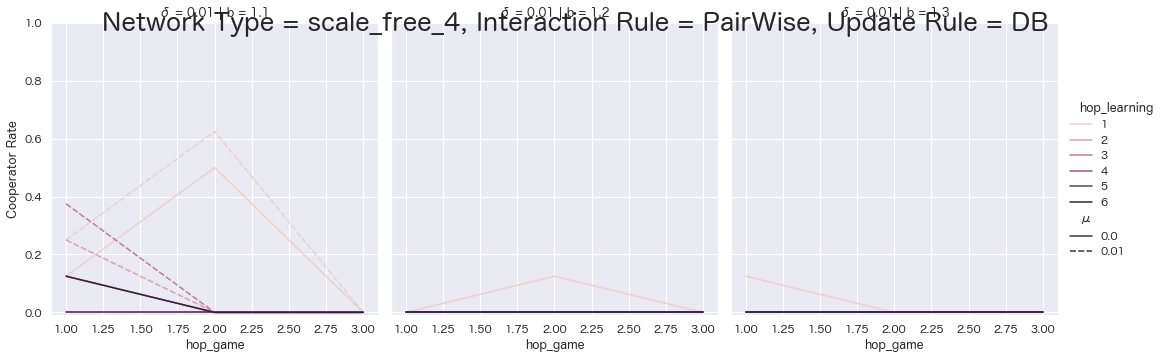

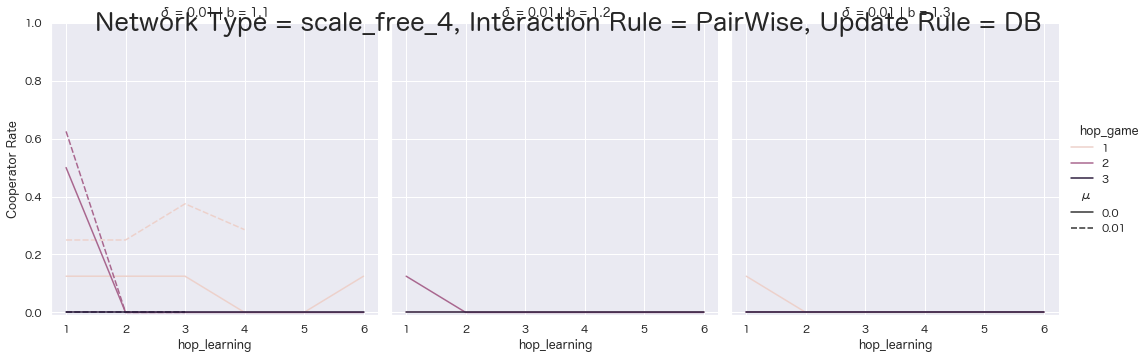

In [9]:
_df = df_ScaleFree_PairWise_DB_IM[
    (df_ScaleFree_PairWise_DB_IM.b <= 1.3) &
    df_ScaleFree_PairWise_DB_IM.hop_game.isin([1, 2, 3])
]
draw_graph(_df, 'hop_game', 'hop_learning')
draw_graph(_df, 'hop_learning', 'hop_game')

## 1.3. Random Pairwise DB の場合は先行研究通りであることを確認。

__ただし、Random Pairwise DB hopG = 1, hopR = 1〜6, b=1.1〜1.2, δ=0.01 のときやや結果が不安定なので世代数を増やして再実行。 → 48でやや安定。どっちかとういと山か？あと52試行ぐらいしてみる。__

In [11]:
df_Random_Pairwise_DB = load_df('../data/clean_data/Random_Pairwise_DB.csv')
cooperate_criteria(df_Random_Pairwise_DB)

,b,δ,hop_game,hop_learning,cooperator_rate_len,cooperator_rate_mean,cooperator_rate_std,cooperator_rate_max
0,1.1,0.01,1,1,2,0.114583,0.044194,0.145833
1,1.1,0.01,1,2,2,0.093750,0.014731,0.104167
2,1.1,0.01,1,3,2,0.166667,0.058926,0.208333
3,1.1,0.01,1,4,2,0.072917,0.014731,0.083333
4,1.1,0.01,1,5,2,0.093750,0.014731,0.104167
5,1.1,0.01,1,6,2,0.072917,0.014731,0.083333
108,1.1,1.00,1,1,2,0.183200,0.005681,0.187218
109,1.1,1.00,1,2,2,0.170954,0.009272,0.177511
114,1.1,1.00,2,1,2,0.181627,0.026959,0.200690
144,1.2,0.01,1,1,2,0.010417,0.014731,0.020833


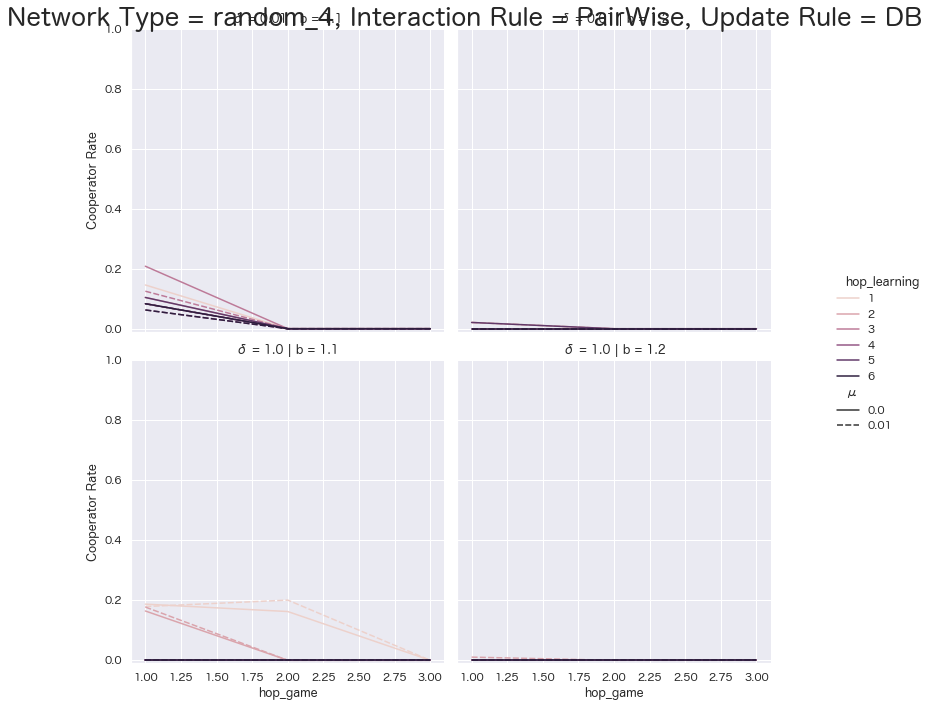

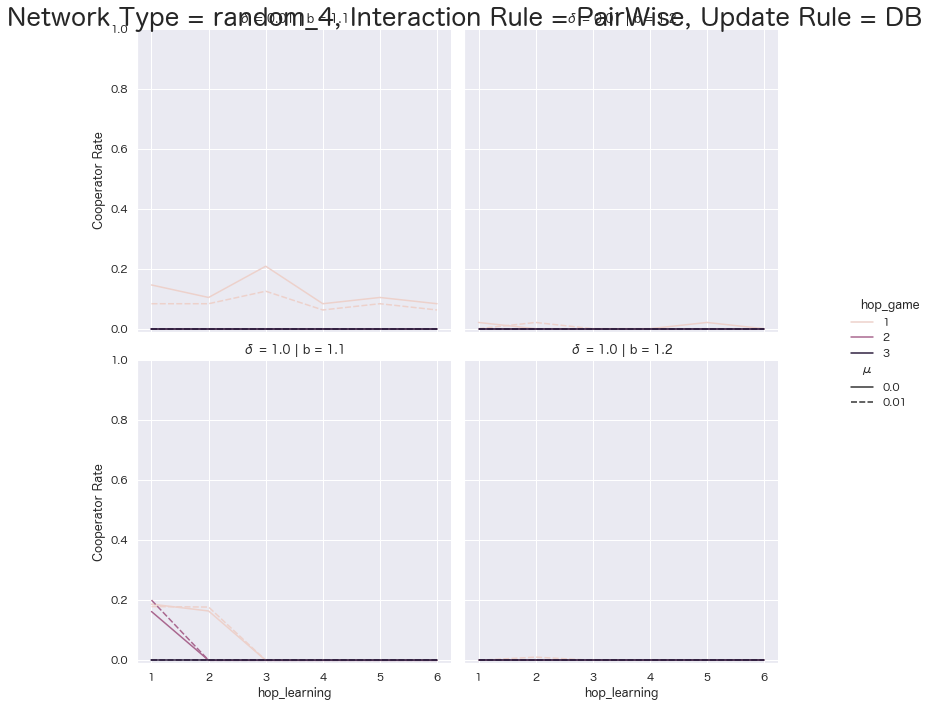

In [12]:
_df = df_Random_Pairwise_DB[
    (df_Random_Pairwise_DB.b <= 1.2) &
    (df_Random_Pairwise_DB.δ.isin([0.01, 1.0])) &
    df_Random_Pairwise_DB.hop_game.isin([1, 2, 3])
]
draw_graph(_df, 'hop_game', 'hop_learning')
draw_graph(_df, 'hop_learning', 'hop_game')

In [13]:
df_Random_Pairwise_DB_2 = load_df('../data/clean_data/Random_Pairwise_DB_2.csv')
cooperate_criteria(df_Random_Pairwise_DB_2)

,b,δ,hop_game,hop_learning,cooperator_rate_len,cooperator_rate_mean,cooperator_rate_std,cooperator_rate_max
0,1.1,0.01,1,1,2,0.083333,0.058926,0.125000
1,1.1,0.01,1,2,2,0.166667,0.000000,0.166667
2,1.1,0.01,1,3,2,0.270833,0.029463,0.291667
3,1.1,0.01,1,4,2,0.104167,0.088388,0.166667
4,1.1,0.01,1,5,2,0.083333,0.000000,0.083333
5,1.1,0.01,1,6,2,0.062500,0.029463,0.083333
6,1.2,0.01,1,1,2,0.020833,0.029463,0.041667
7,1.2,0.01,1,2,2,0.020833,0.029463,0.041667


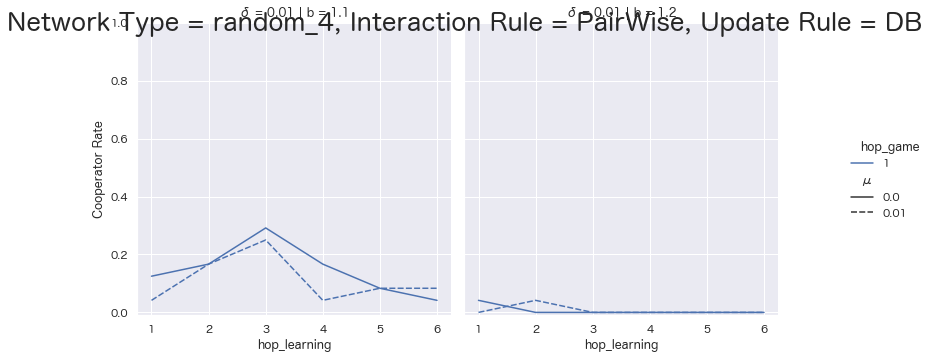

In [14]:
_df = df_Random_Pairwise_DB_2
draw_graph(_df, 'hop_learning', 'hop_game')

## 1.4. Regular Pairwise DB の場合は先行研究通りであることを確認。

__ただし、Regular Pairwise DB hopG = 1, hopR = 1〜6, b=1.1, δ=0.01 のときやや結果が不安定なので世代数を増やして再実行。__

__ただし、Regular Pairwise DB hopG = 1, hopR = 1〜6, b=1.2, δ=1.0 のときやや結果が不安定(なだらかな山)なので世代数を増やして再実行。__

In [15]:
df_Regular_Pairwise_DB = load_df('../data/clean_data/Regular_Pairwise_DB.csv')
cooperate_criteria(df_Regular_Pairwise_DB)

,b,δ,hop_game,hop_learning,cooperator_rate_len,cooperator_rate_mean,cooperator_rate_std,cooperator_rate_max
0,1.1,0.01,1,1,2,0.343750,0.103120,0.416667
1,1.1,0.01,1,2,2,0.041667,0.058926,0.083333
2,1.1,0.01,1,3,2,0.125000,0.117851,0.208333
3,1.1,0.01,1,4,2,0.062500,0.088388,0.125000
4,1.1,0.01,1,5,2,0.020833,0.029463,0.041667
5,1.1,0.01,1,6,2,0.104167,0.029463,0.125000
6,1.1,0.01,2,1,2,0.041667,0.000000,0.041667
12,1.1,0.01,3,1,2,0.020833,0.029463,0.041667
36,1.1,0.10,1,1,2,0.125000,0.000000,0.125000
72,1.1,0.50,1,1,2,0.093750,0.014731,0.104167


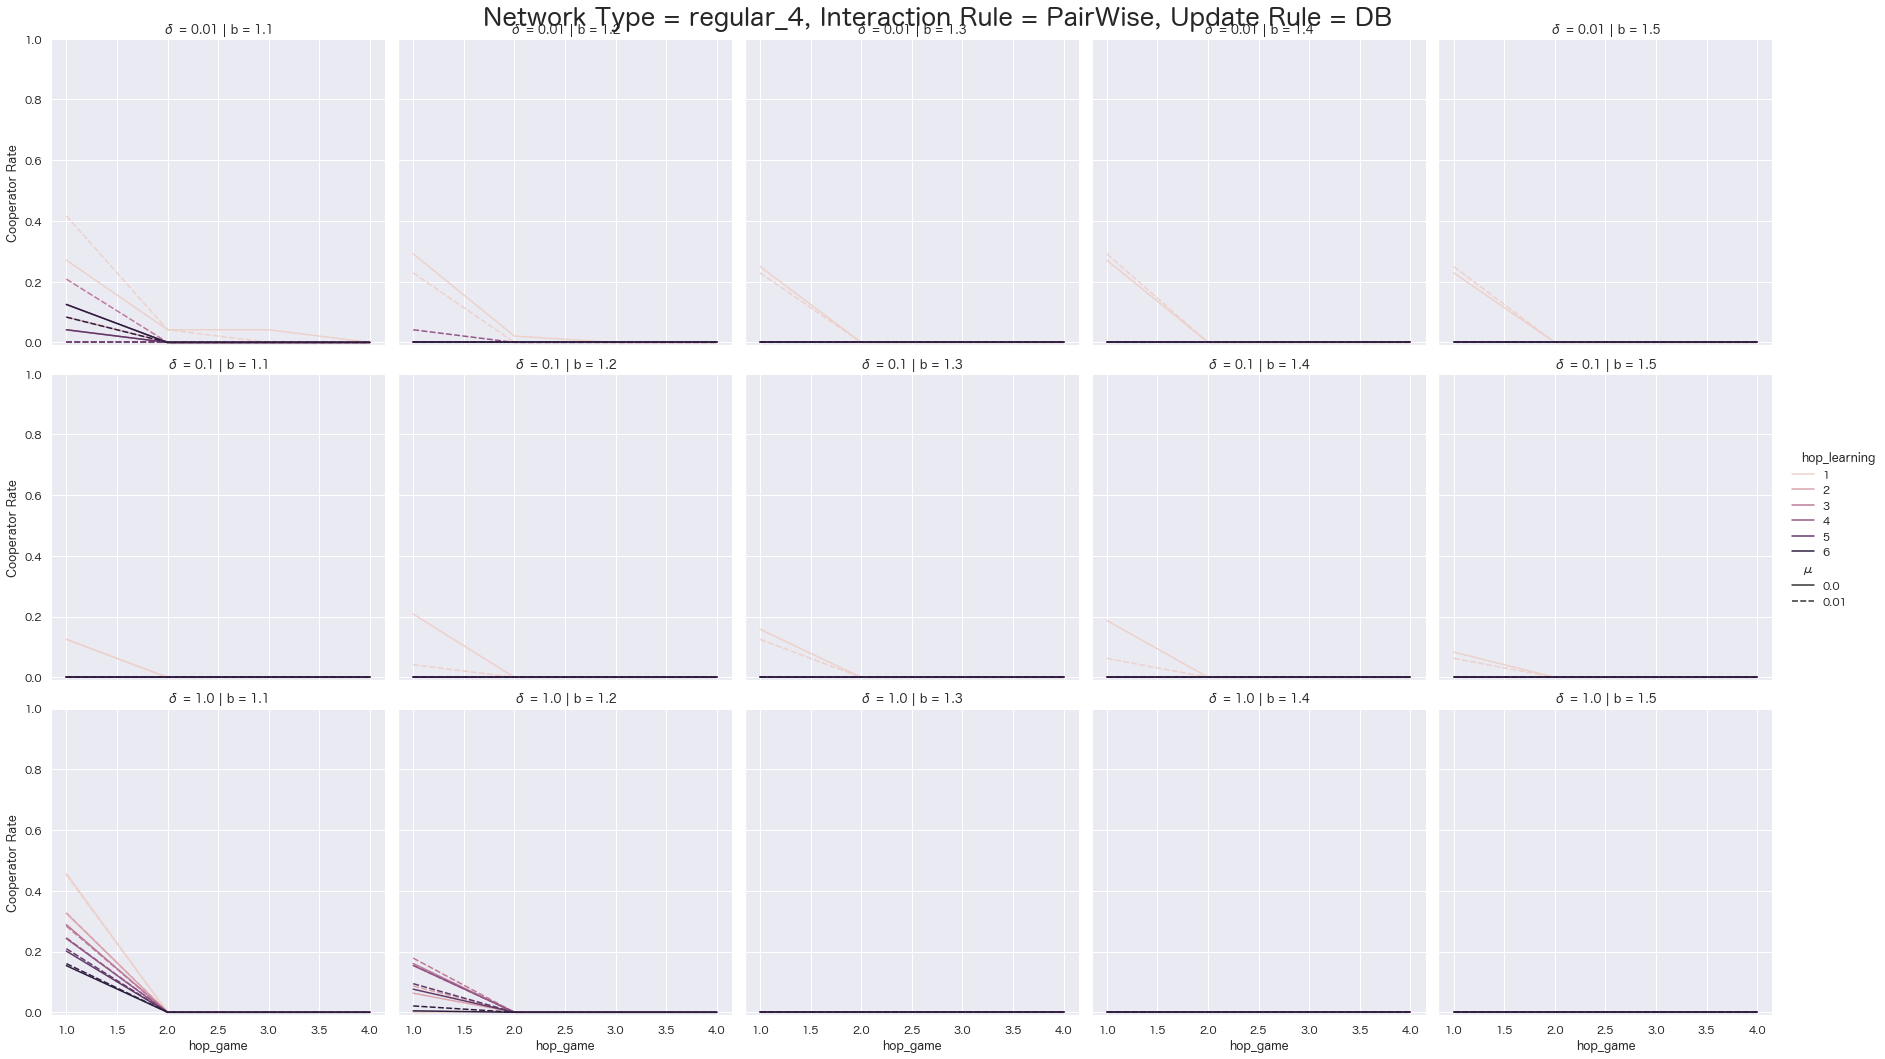

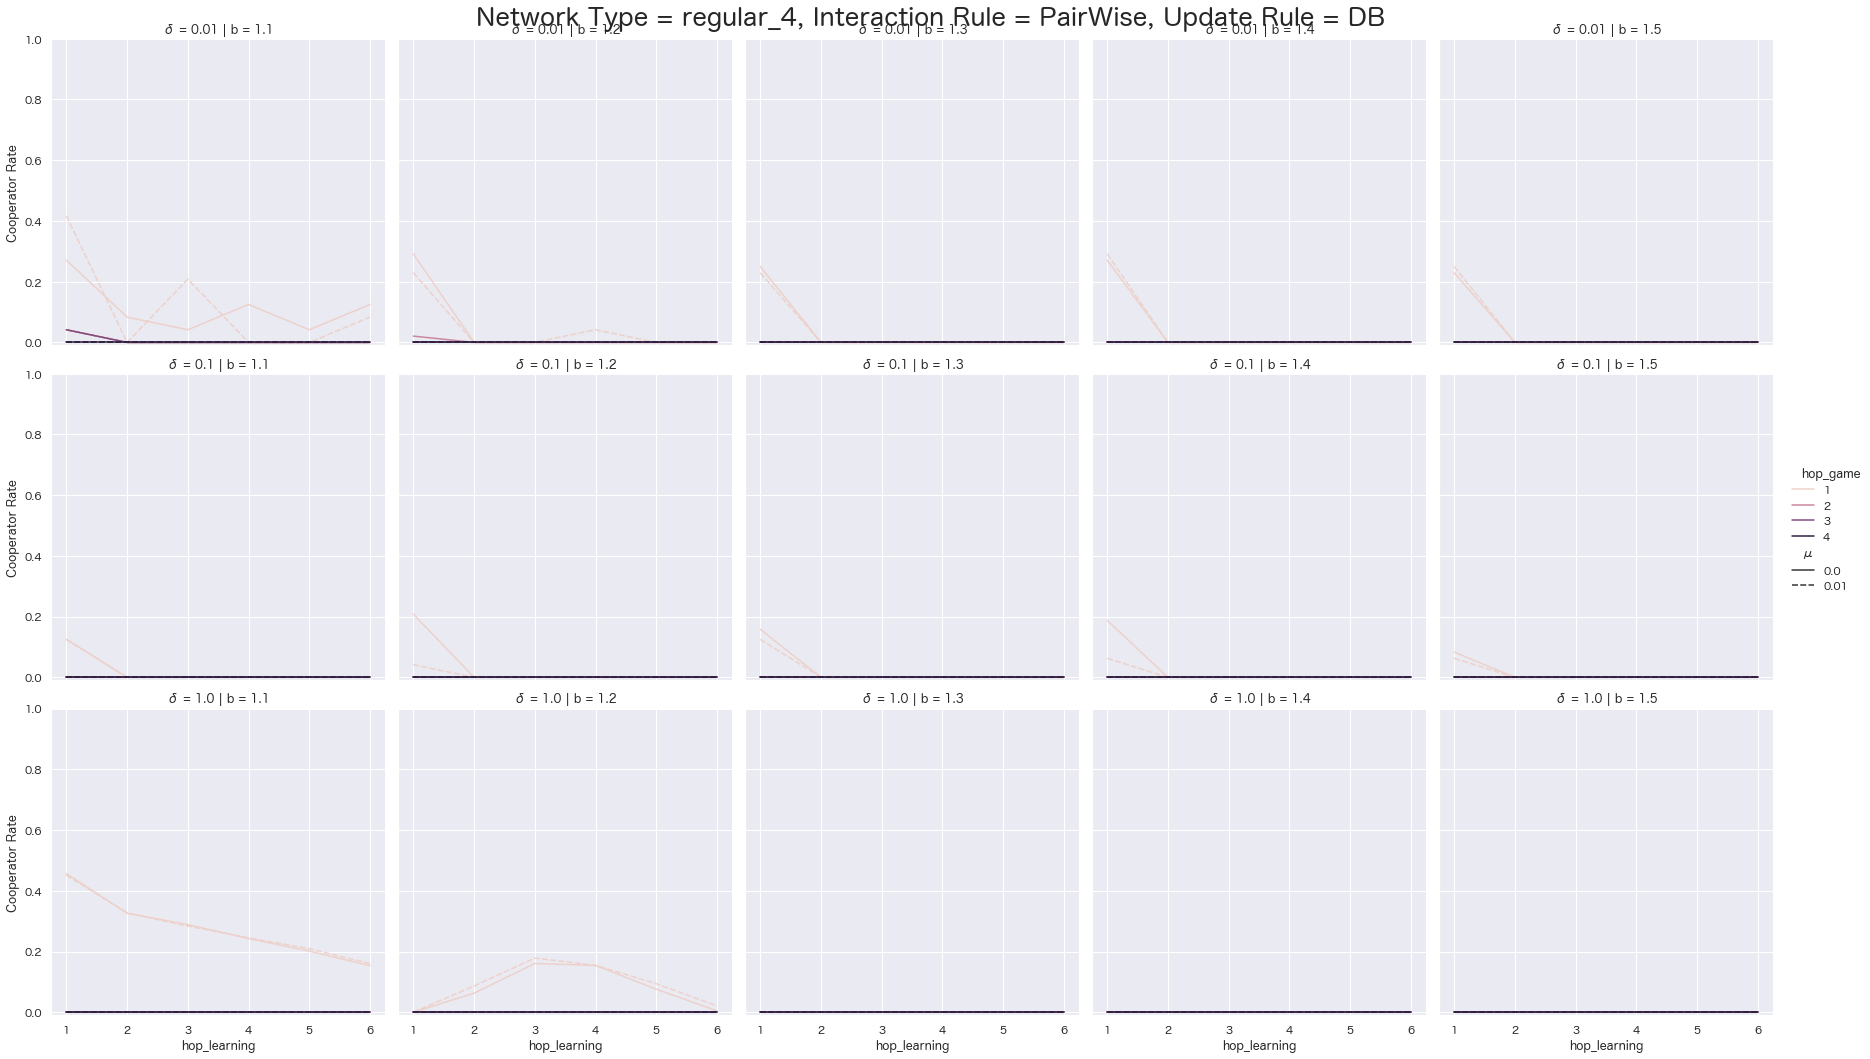

In [16]:
_df = df_Regular_Pairwise_DB[
    (df_Random_Pairwise_DB.hop_game <= 4) &
    df_Random_Pairwise_DB.δ.isin([0.01, 0.1, 1.0])
]
draw_graph(_df, 'hop_game', 'hop_learning')
draw_graph(_df, 'hop_learning', 'hop_game')

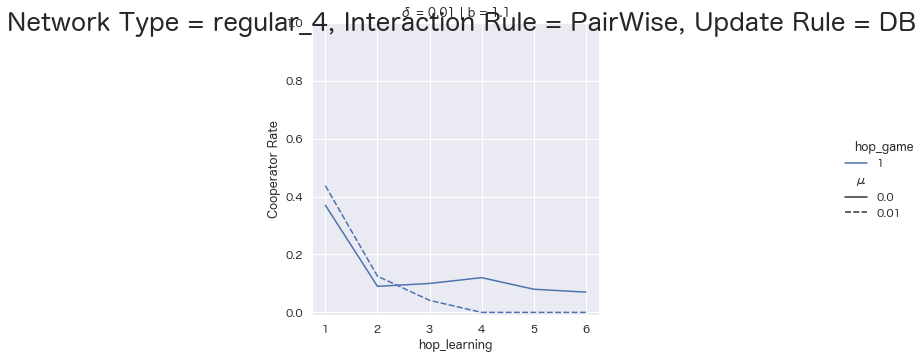

In [17]:
df_Regular_Pairwise_DB_2 = load_df('../data/clean_data/Regular_Pairwise_DB_2.csv')
draw_graph(df_Regular_Pairwise_DB_2, 'hop_learning', 'hop_game')

In [18]:
df_Regular_Pairwise_DB_3 = load_df('../data/clean_data/Regular_Pairwise_DB_3.csv')
cooperate_criteria(df_Regular_Pairwise_DB_3)

,b,δ,hop_game,hop_learning,cooperator_rate_len,cooperator_rate_mean,cooperator_rate_std,cooperator_rate_max


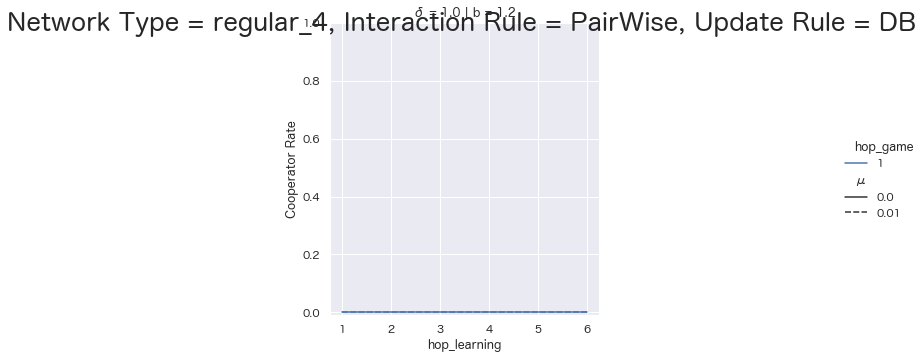

In [19]:
_df = df_Regular_Pairwise_DB_3
draw_graph(_df, 'hop_learning', 'hop_game')

# 図10

# 2. Group

In [20]:
df_All_Group_All = load_df('../data/clean_data/All_Group_All.csv')
cooperate_criteria(df_All_Group_All)

,b,δ,hop_game,hop_learning,cooperator_rate_len,cooperator_rate_mean,cooperator_rate_std,cooperator_rate_max
108,4.0,0.0625,1,1,18,0.118402,0.208217,0.642689
109,4.0,0.0625,1,2,18,0.013588,0.039384,0.124856
110,4.0,0.0625,1,3,18,0.001236,0.003533,0.014528
112,4.0,0.0625,1,5,18,0.001697,0.004630,0.016018
113,4.0,0.0625,1,6,18,0.002635,0.007171,0.024909
144,4.0,0.2500,1,1,18,0.102663,0.178749,0.521381
145,4.0,0.2500,1,2,18,0.013225,0.035980,0.116078
149,4.0,0.2500,1,6,18,0.001025,0.003413,0.014144
180,4.0,1.0000,1,1,18,0.062136,0.132860,0.425289
190,4.0,1.0000,2,1,18,0.002315,0.009821,0.041667


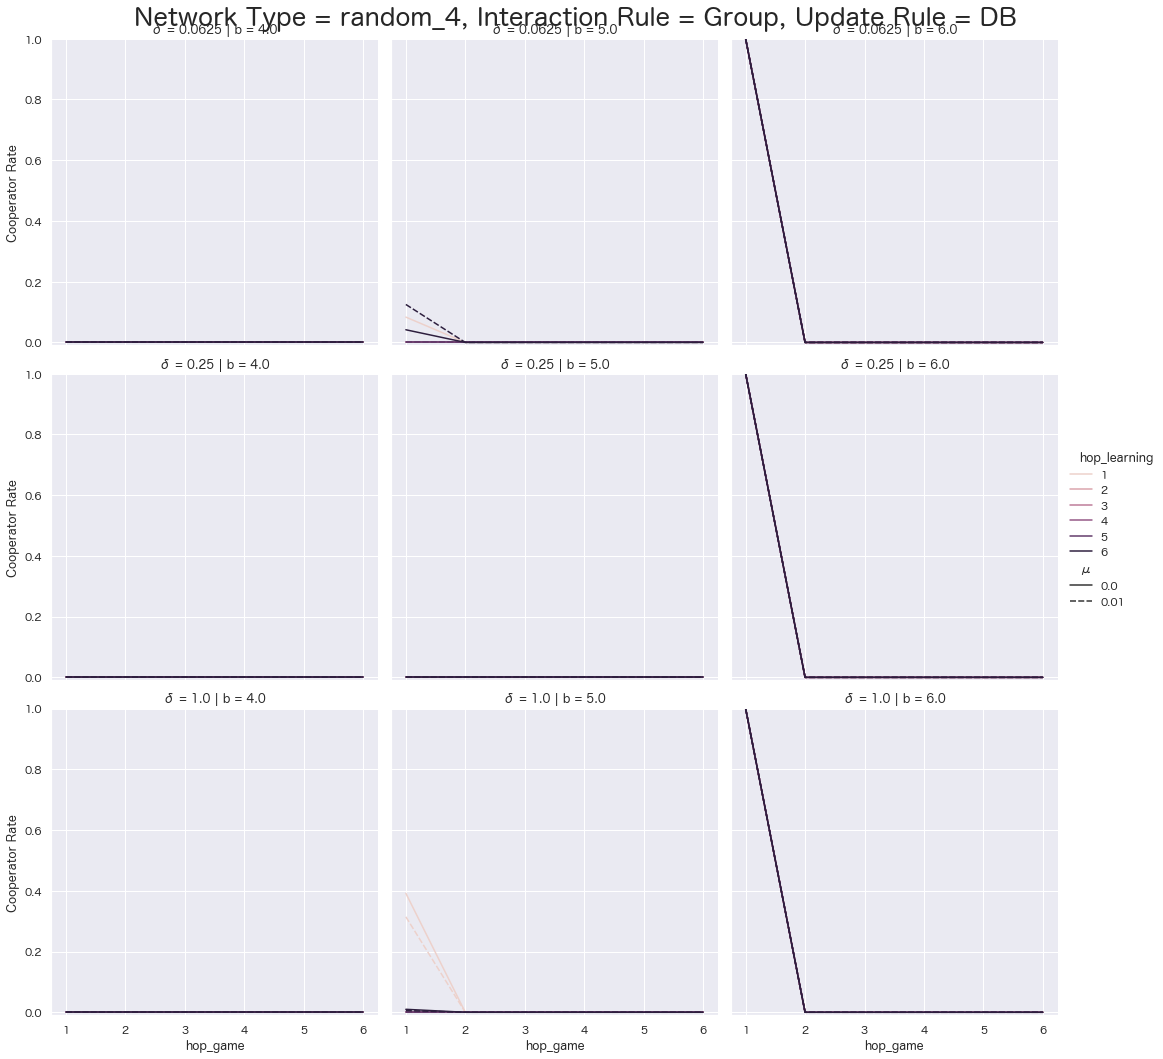

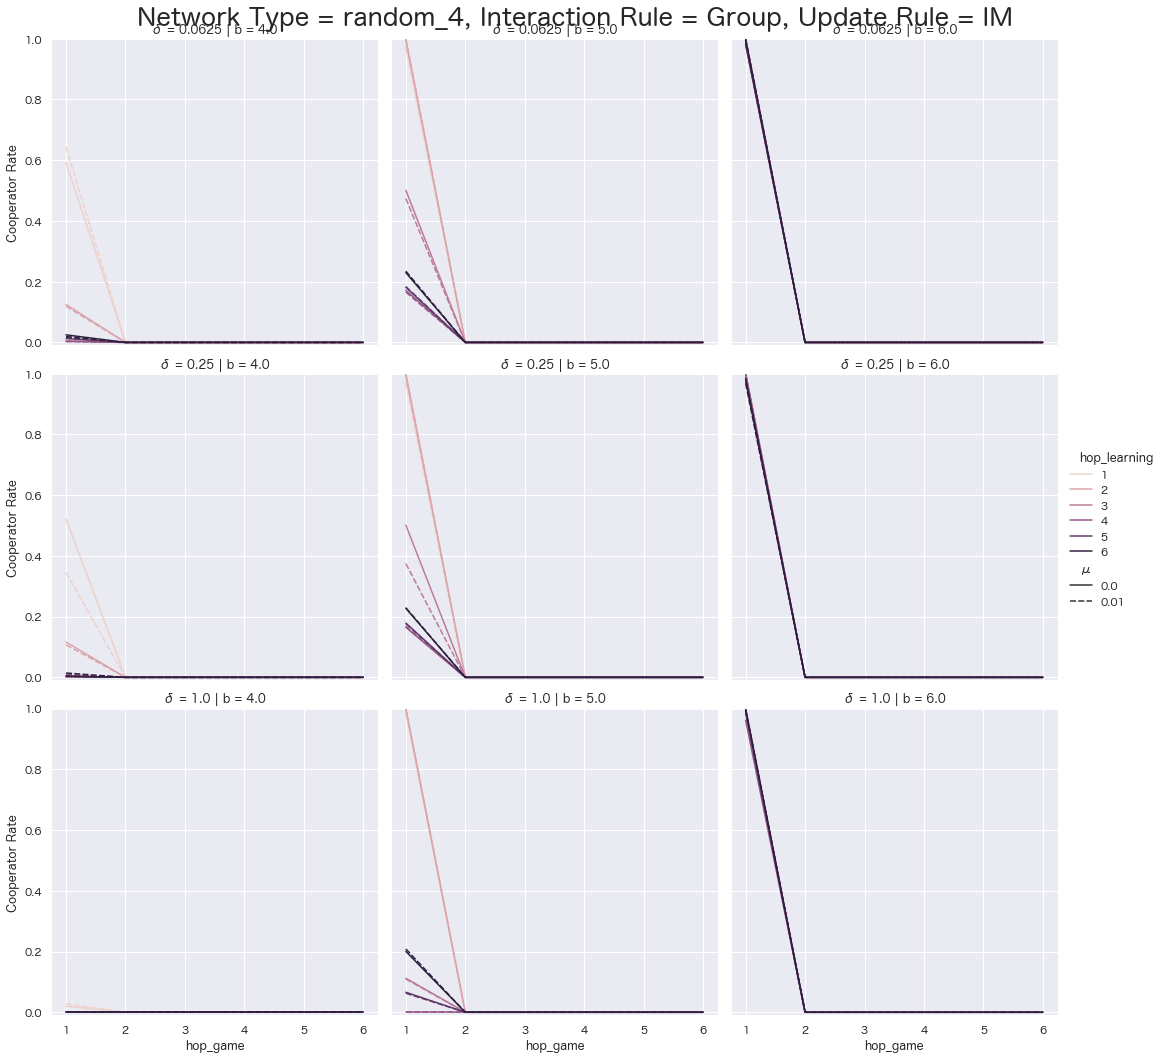

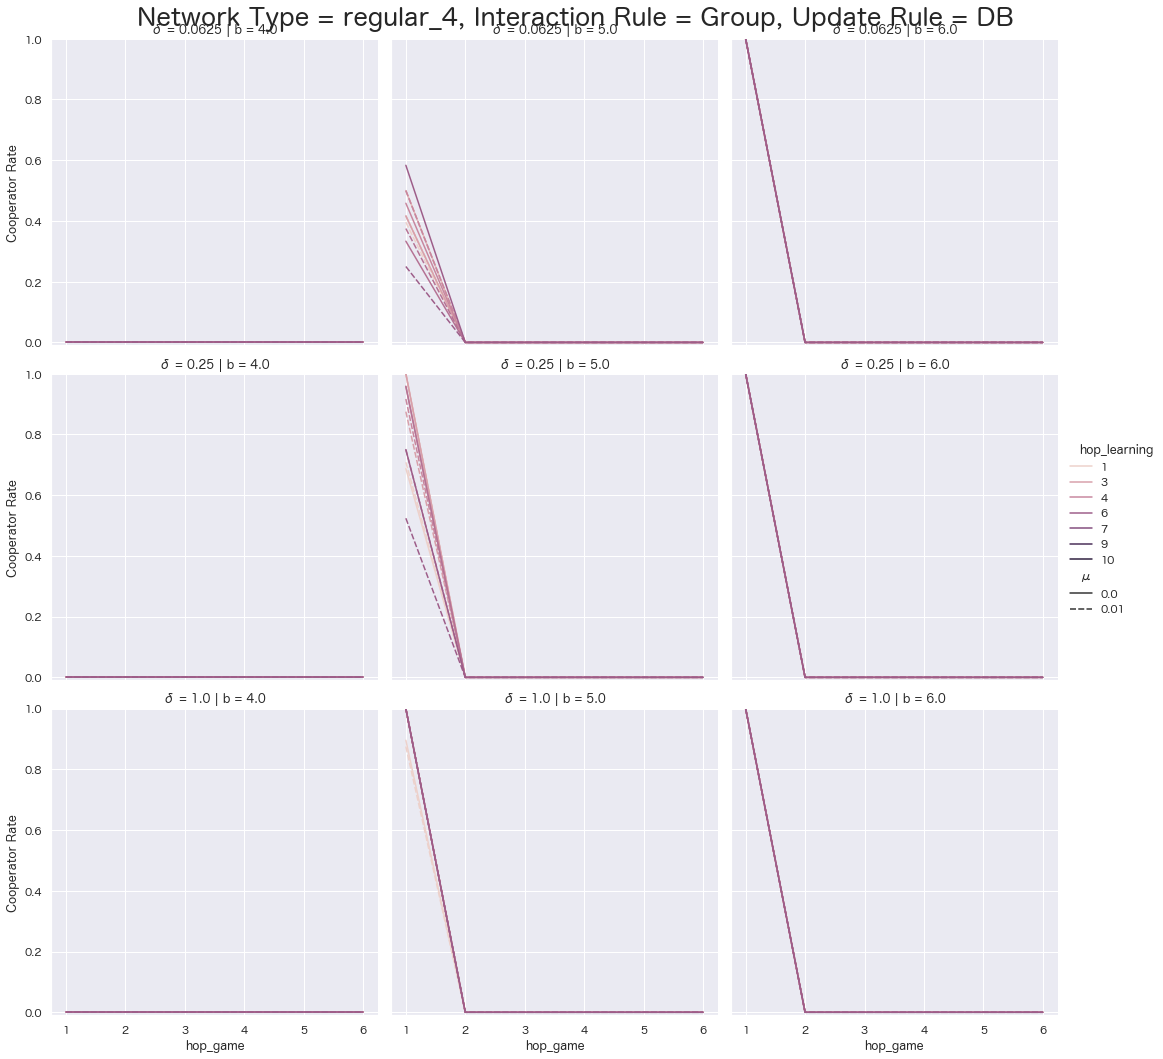

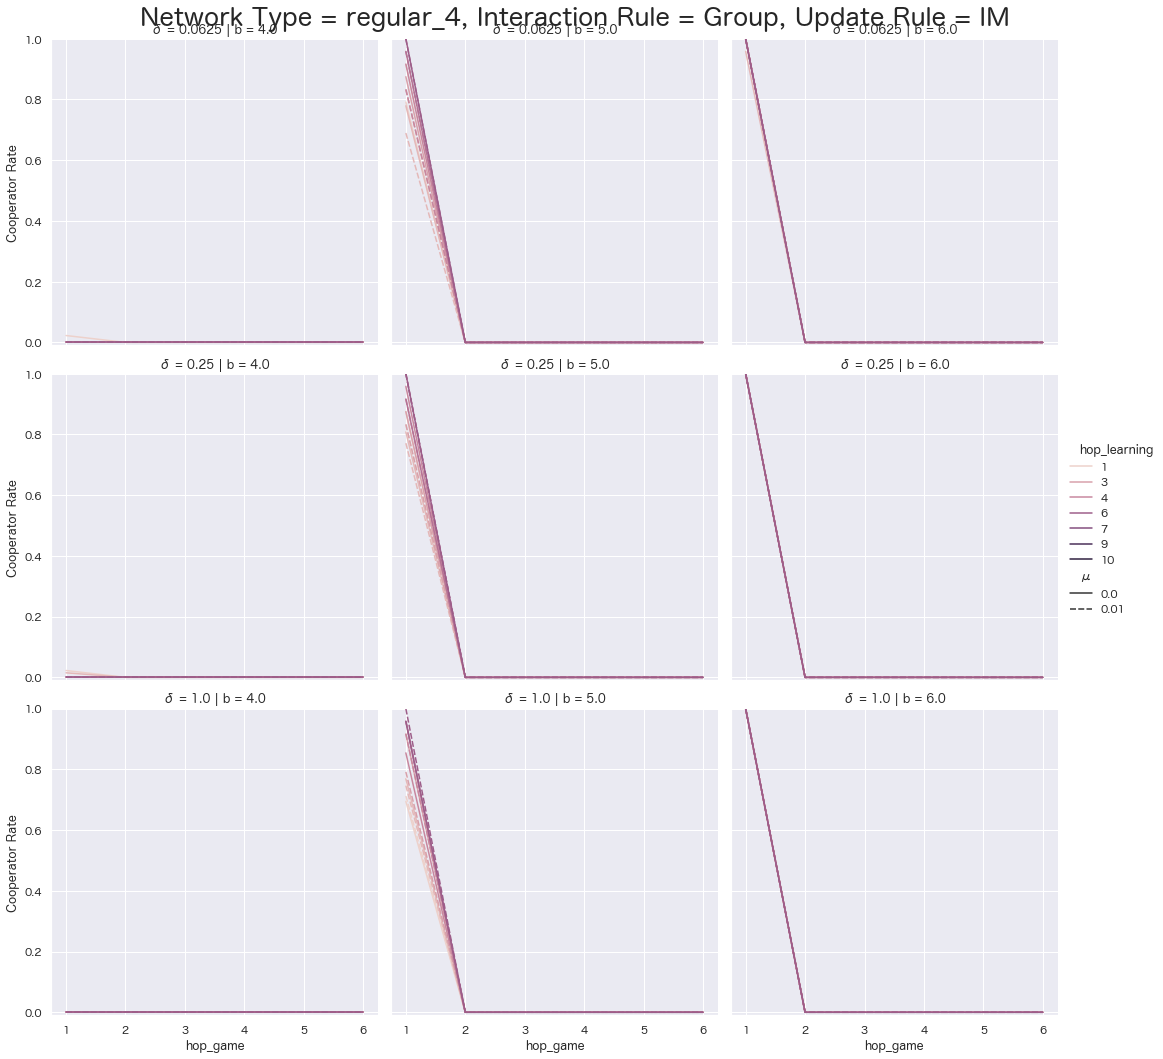

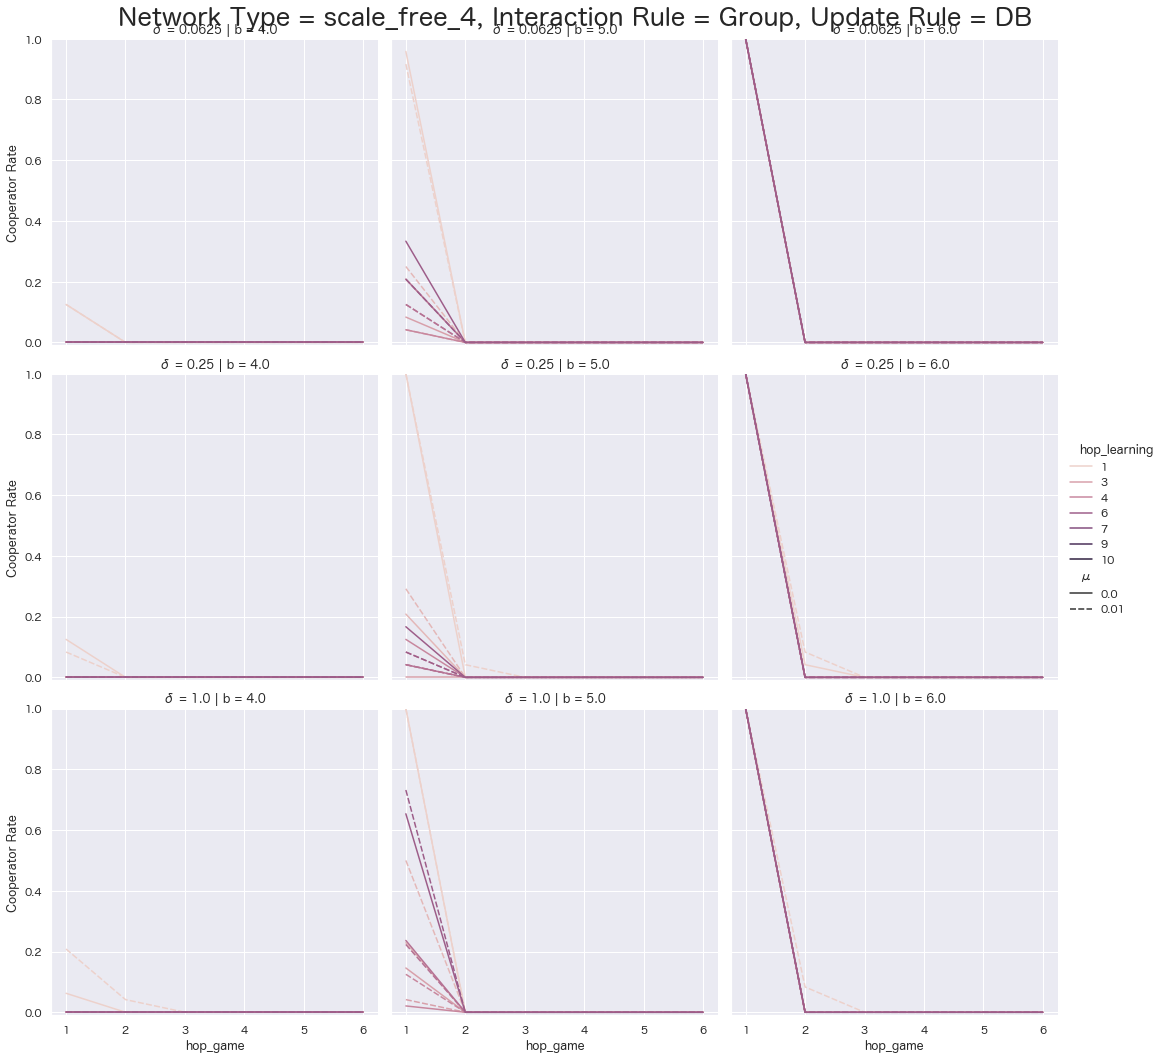

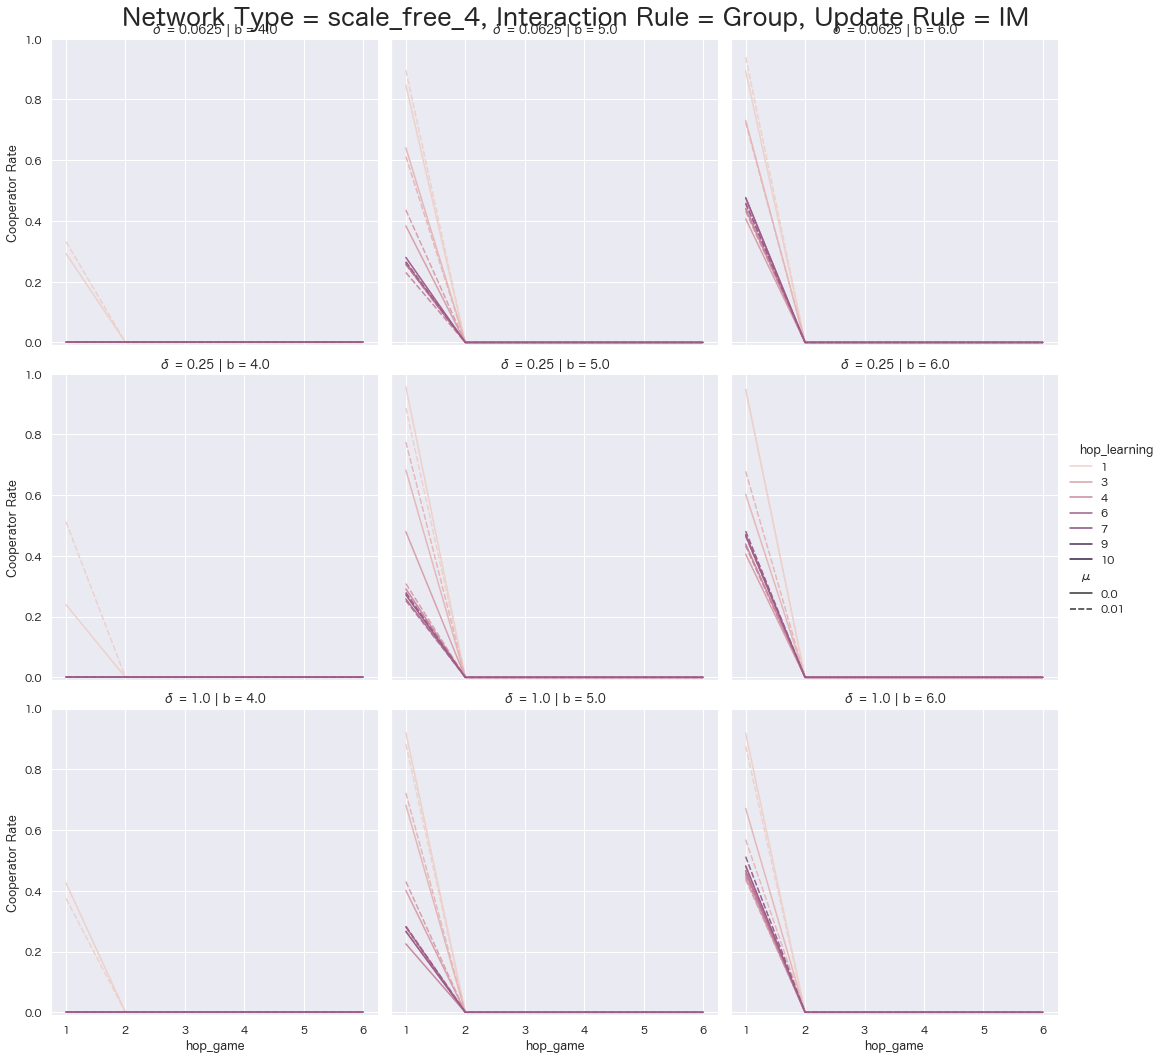

In [21]:
_df = df_All_Group_All[(df_All_Group_All.b > 3.0) & (df_All_Group_All.update_rule != 'BD')]
draw_graph(_df, 'hop_game', 'hop_learning')

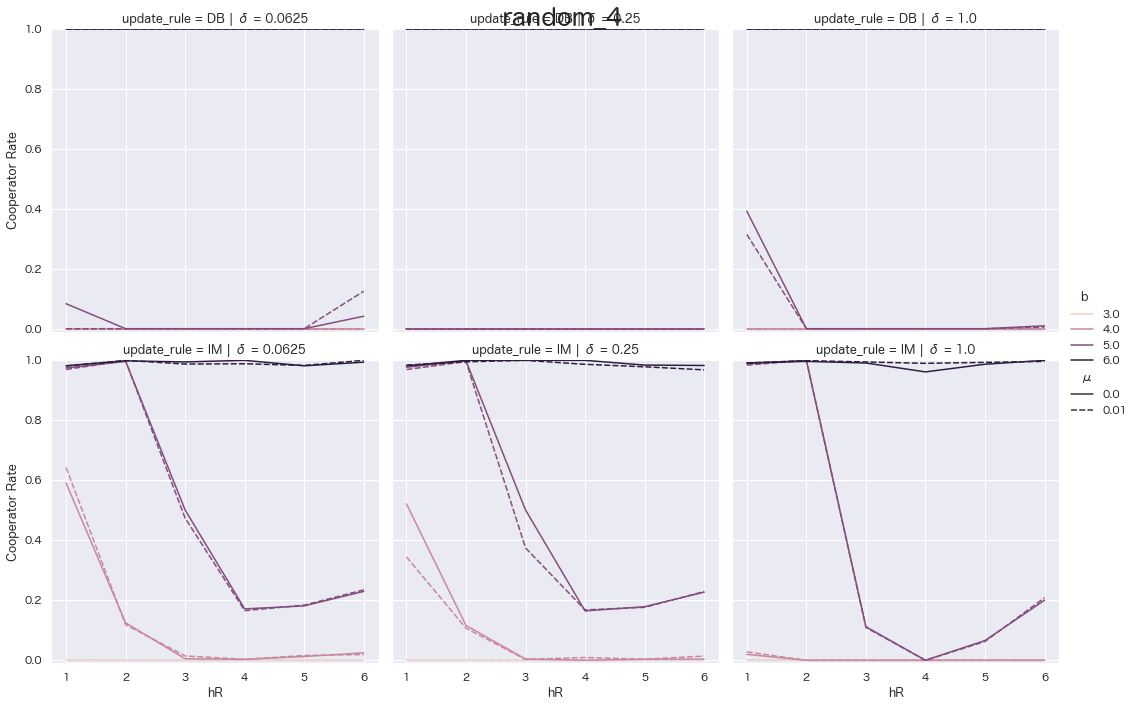

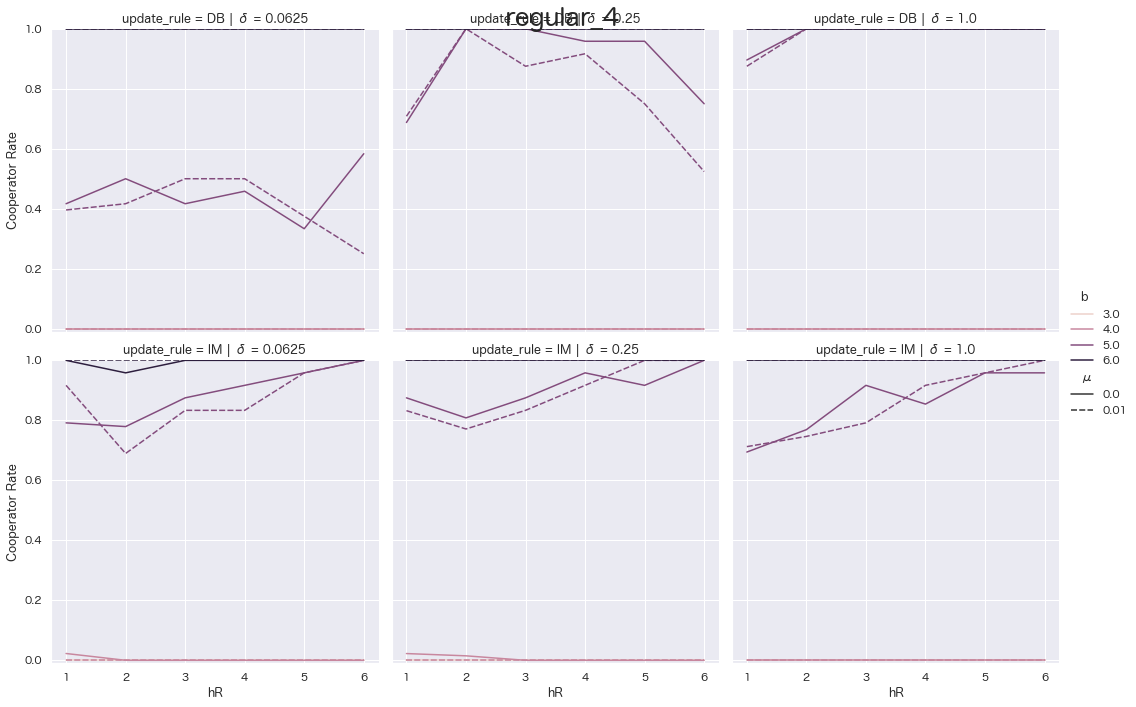

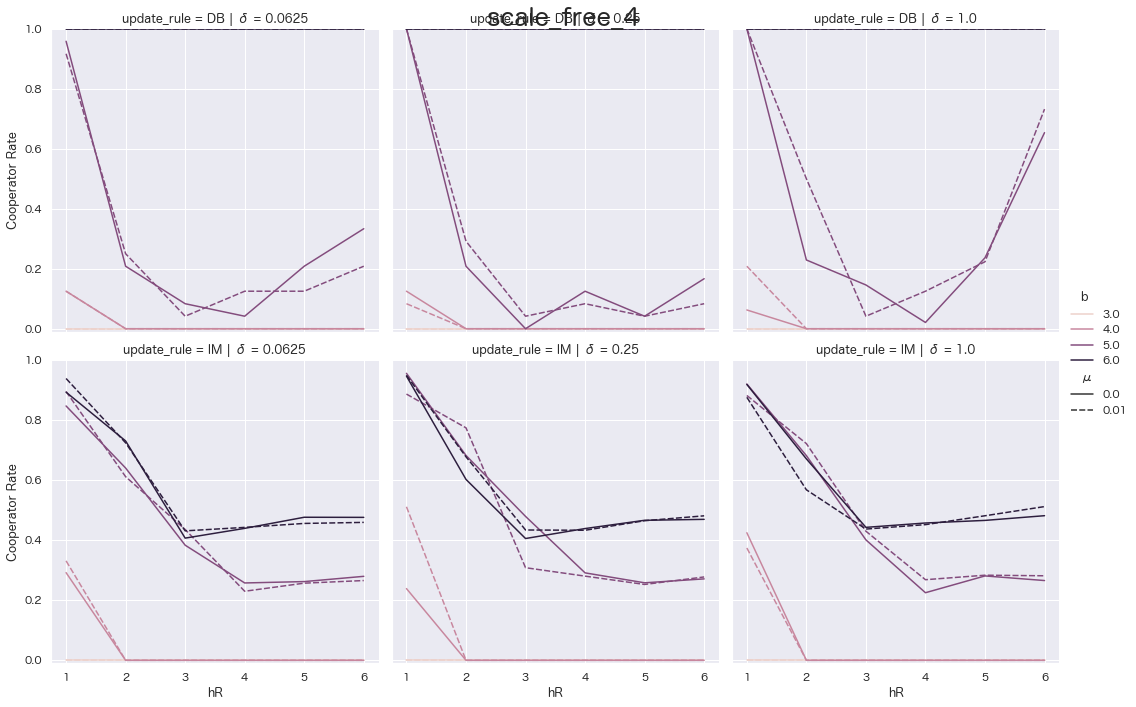

In [22]:
df_All_Group_All_hg1 = df_All_Group_All[
    (df_All_Group_All.interaction_rule == 'Group') &
    (df_All_Group_All.update_rule != 'BD') &
    (df_All_Group_All.hop_game == 1) &
    (df_All_Group_All.hop_learning <= 6)
]
_df = df_All_Group_All_hg1

for network_type in _df.network_type.unique():
    __df = _df[(_df.network_type == network_type)][[
        'hop_learning', 'b', 'δ', 'μ', 'update_rule', 'cooperator_rate'
    ]].reset_index(drop=True)
    g = sns.relplot(kind='line', x='hop_learning', y='cooperator_rate', hue='b', col='δ', row='update_rule', style='μ', data=__df)
    g.set_axis_labels('hR', 'Cooperator Rate')
    g.fig.suptitle(network_type, size=25)
    g.fig.subplots_adjust(top=.95)
    g.set(ylim=(-0.01, 1))

In [23]:
# regular BD δ = 1 は収束している？
df_All_Group_All_hg1[
    (df_All_Group_All_hg1.network_type == 'scale_free_4') &
    (df_All_Group_All_hg1.update_rule == 'BD') &
    (df_All_Group_All_hg1.δ == 1.0) & 
    (df_All_Group_All_hg1.cooperator_rate > 0.1)
]

,network_type,hop_game,hop_learning,b,μ,δ,interaction_rule,update_rule,cooperator_rate


## Scale Free, DB で生じる谷を確認

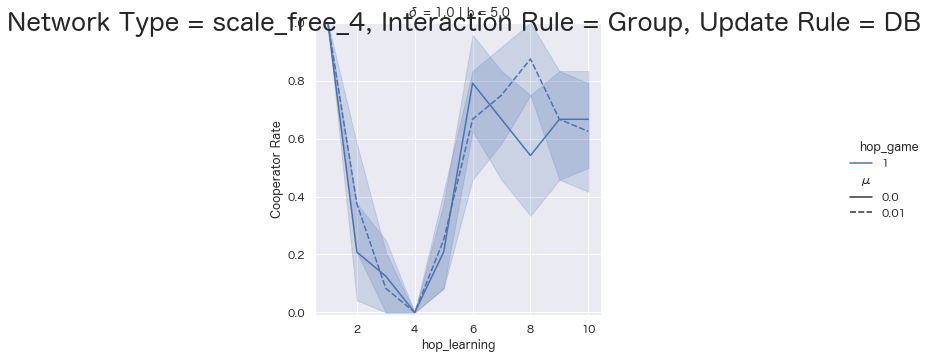

In [24]:
_df = pd.read_csv('../data/clean_data/ScaleFree_Group_DB.csv', header=None, names=COLUMNS.keys(), dtype=COLUMNS)
draw_graph(_df, 'hop_learning', 'hop_game')

## Scale Free, IM で生じるプラトーを確認

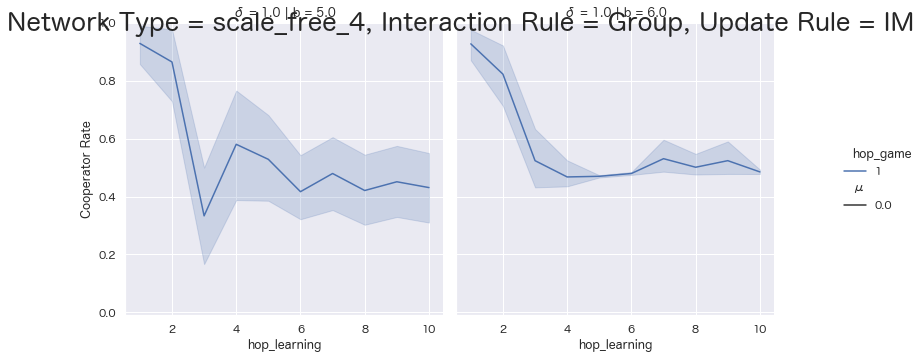

In [25]:
_df = pd.read_csv('../data/clean_data/ScaleFree_Group_IM.csv', header=None, names=COLUMNS.keys(), dtype=COLUMNS)
draw_graph(_df, 'hop_learning', 'hop_game')

## Random Group BD で世代数を増やして、かつ、bを細かくして確認。

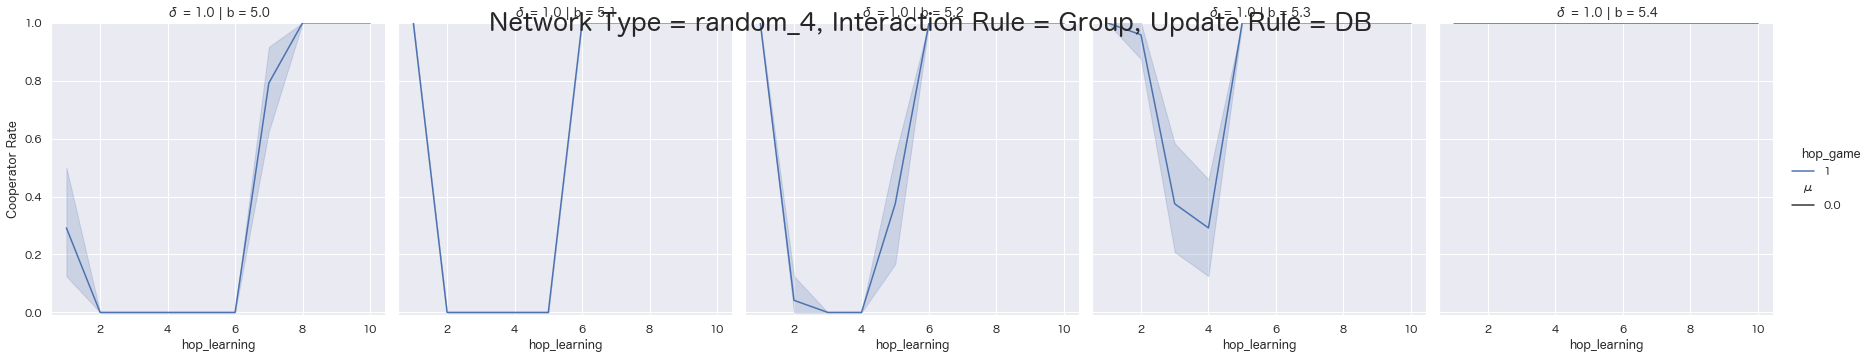

In [26]:
_df = pd.read_csv('../data/clean_data/Random_Group_DB.csv', header=None, names=COLUMNS.keys(), dtype=COLUMNS)
_df = _df[(_df.b >= 5.0) & (_df.b <= 5.4)]
draw_graph(_df, 'hop_learning', 'hop_game')

## Random Group IM で世代数を増やして、かつ、bを細かくして確認。

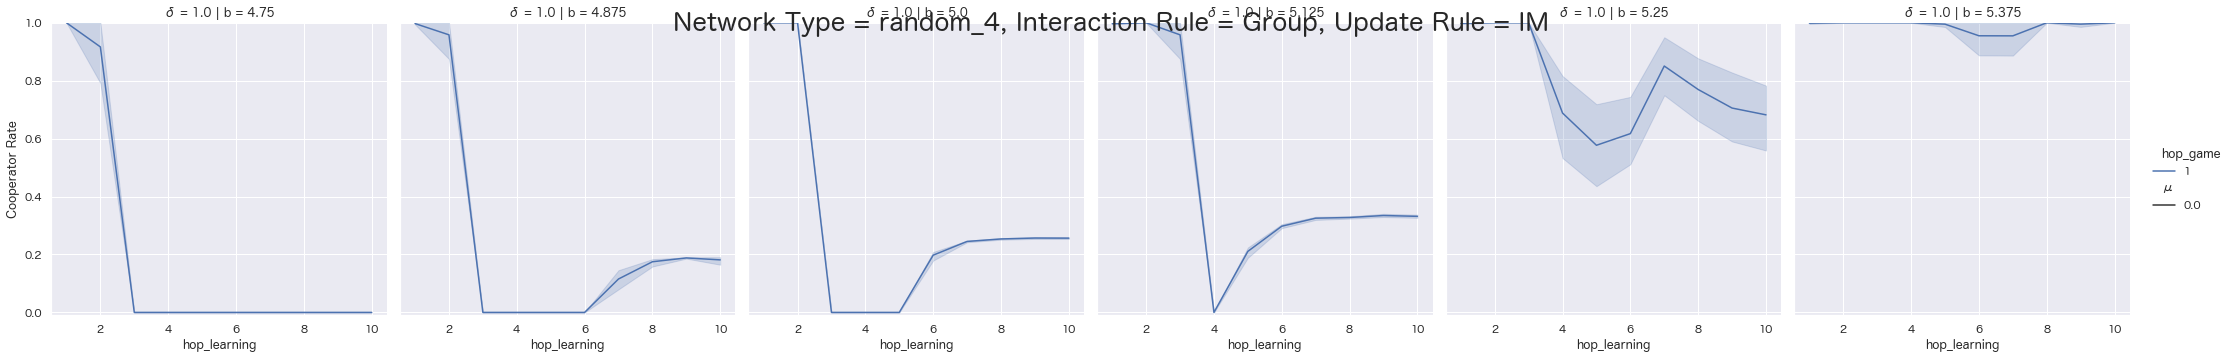

In [27]:
_df = pd.read_csv('../data/clean_data/Random_Group_IM.csv', header=None, names=COLUMNS.keys(), dtype=COLUMNS)
_df = _df[(_df.b >= 4.75) & (_df.b <= 5.4)]
draw_graph(_df, 'hop_learning', 'hop_game')

## Regular Group DB

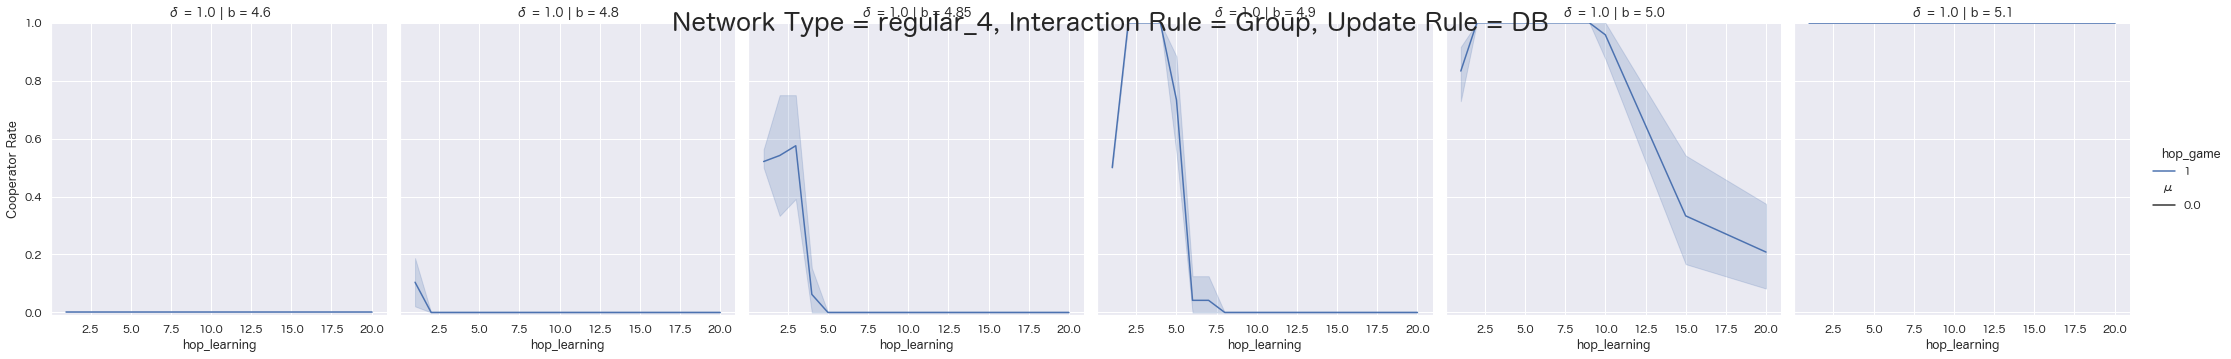

In [28]:
_df = pd.read_csv('../data/clean_data/Regular_Group_DB.csv', header=None, names=COLUMNS.keys(), dtype=COLUMNS)
_df = _df[(_df.b >= 4.6) & (_df.b <= 5.1)]
draw_graph(_df, 'hop_learning', 'hop_game')

## Regular Group IM

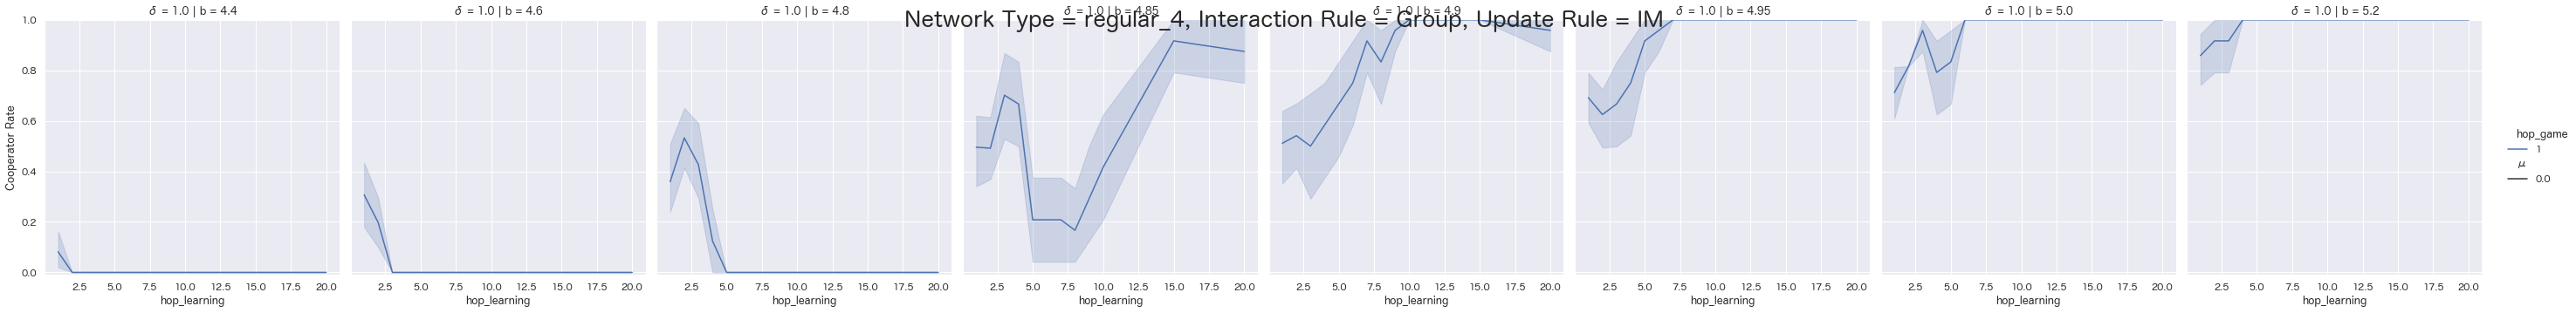

In [29]:
_df = pd.read_csv('../data/clean_data/Regular_Group_IM.csv', header=None, names=COLUMNS.keys(), dtype=COLUMNS)
draw_graph(_df, 'hop_learning', 'hop_game')